In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import validation_curve
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
import warnings
warnings.filterwarnings('ignore')
# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('Batsman_All.csv')
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,hundred,fifty,zero,four,six,rating,res
0,Abdur Razzak,2004-2014,153,97,39,779,53,13.43,1020,76.37,0,1,12,55,21,12.371973,0
1,Abul Hasan,2012-2018,7,3,0,11,7,3.66,16,68.75,0,0,0,1,0,5.687500,0
2,Abu Hider,2018-2018,2,1,0,1,1,1.00,11,9.09,0,0,0,0,0,1.090909,0
3,Afif Hossain,2020-2020,1,1,0,7,7,7.00,4,175.00,0,0,0,1,0,12.750000,0
4,Aftab Ahmed,2004-2010,85,85,6,1954,92,24.73,2353,83.04,0,14,8,205,49,37.089253,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Taskin Ahmed,2014-2017,32,16,6,41,14,4.10,99,41.41,0,0,3,2,0,3.476641,0
124,Tushar Imran,2001-2007,41,40,0,574,65,14.35,970,59.17,0,2,8,67,1,21.841753,1
125,Zahid Razzak,1988-1990,3,3,0,14,6,4.66,44,31.81,0,0,0,0,0,4.984848,0
126,Zakir Hossain,1998-1998,1,1,0,0,0,0.00,1,0.00,0,0,1,0,0,0.000000,0


In [26]:
inputs=df.drop(['res','rating'],axis='columns')
inputs.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,hundred,fifty,zero,four,six
0,Abdur Razzak,2004-2014,153,97,39,779,53,13.43,1020,76.37,0,1,12,55,21
1,Abul Hasan,2012-2018,7,3,0,11,7,3.66,16,68.75,0,0,0,1,0
2,Abu Hider,2018-2018,2,1,0,1,1,1.00,11,9.09,0,0,0,0,0
3,Afif Hossain,2020-2020,1,1,0,7,7,7.00,4,175.00,0,0,0,1,0
4,Aftab Ahmed,2004-2010,85,85,6,1954,92,24.73,2353,83.04,0,14,8,205,49


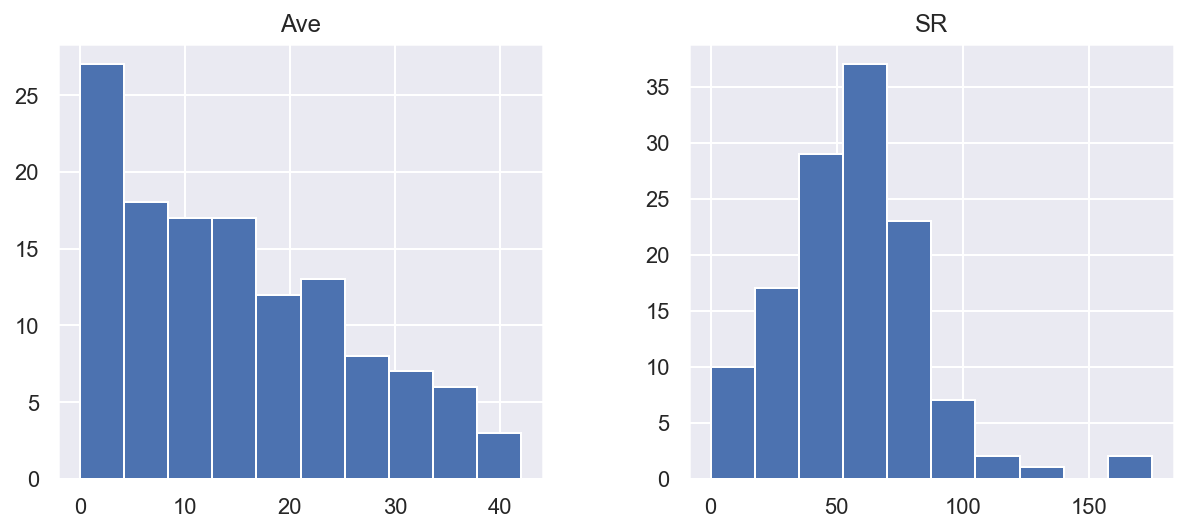

In [9]:
features = ['Ave', 'SR']
df[features].hist(figsize=(10, 4));

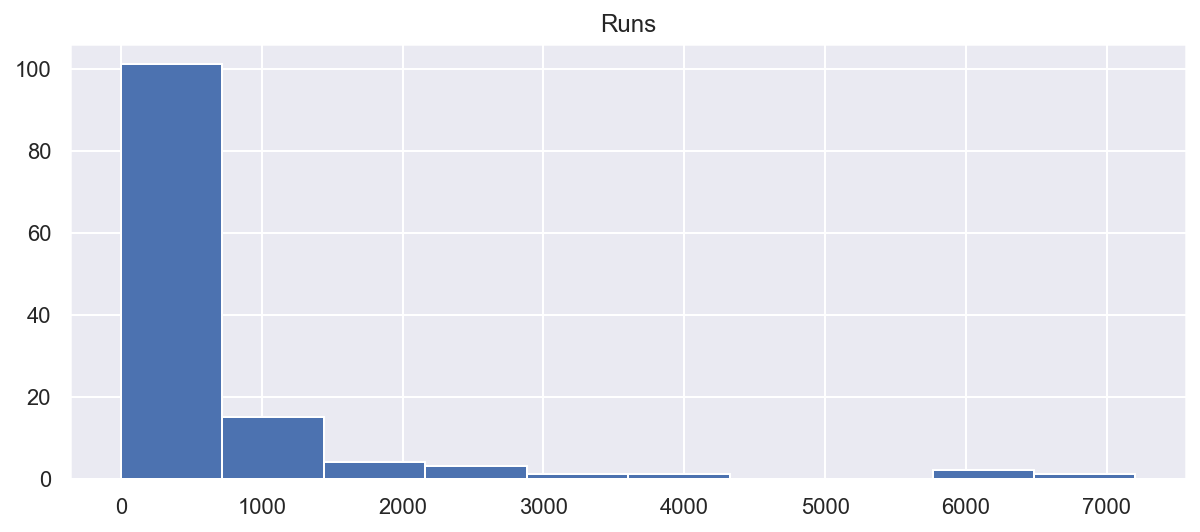

In [10]:
features = ['Runs']
df[features].hist(figsize=(10, 4));

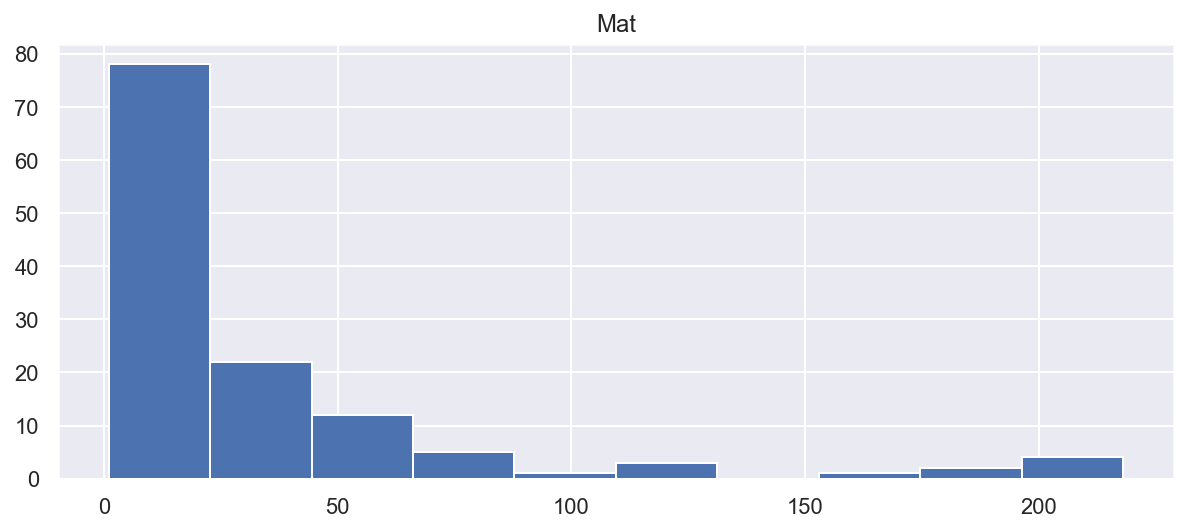

In [23]:
features = ['Mat']
df[features].hist(figsize=(10, 4));

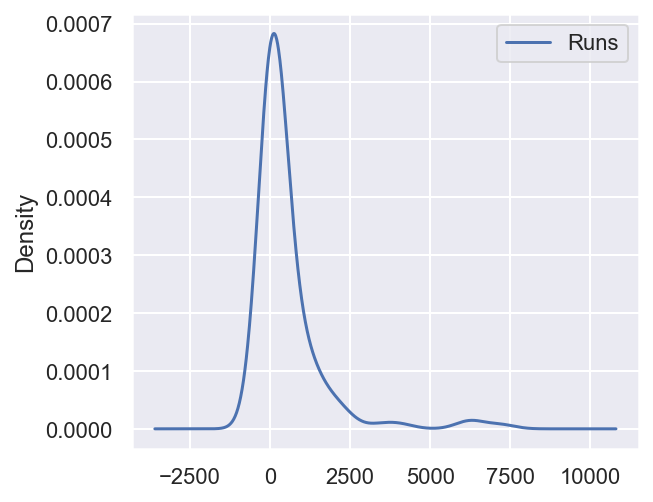

In [11]:
df[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

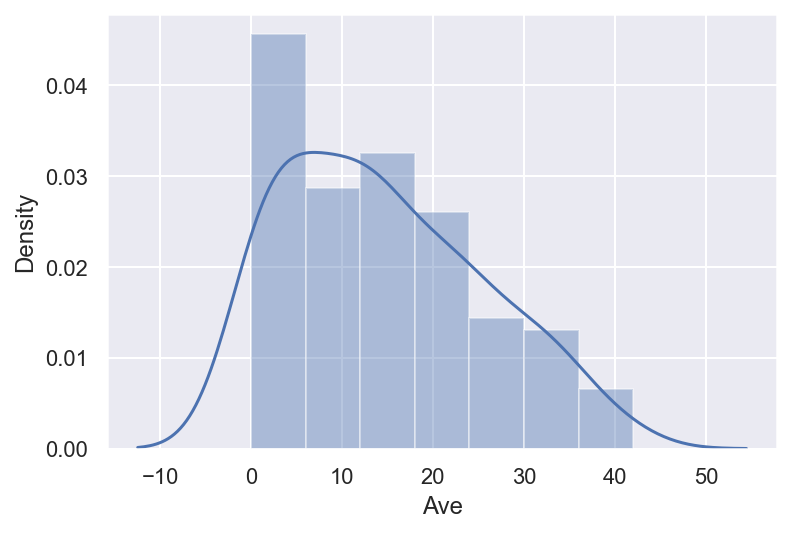

In [12]:
sns.distplot(df['Ave']);

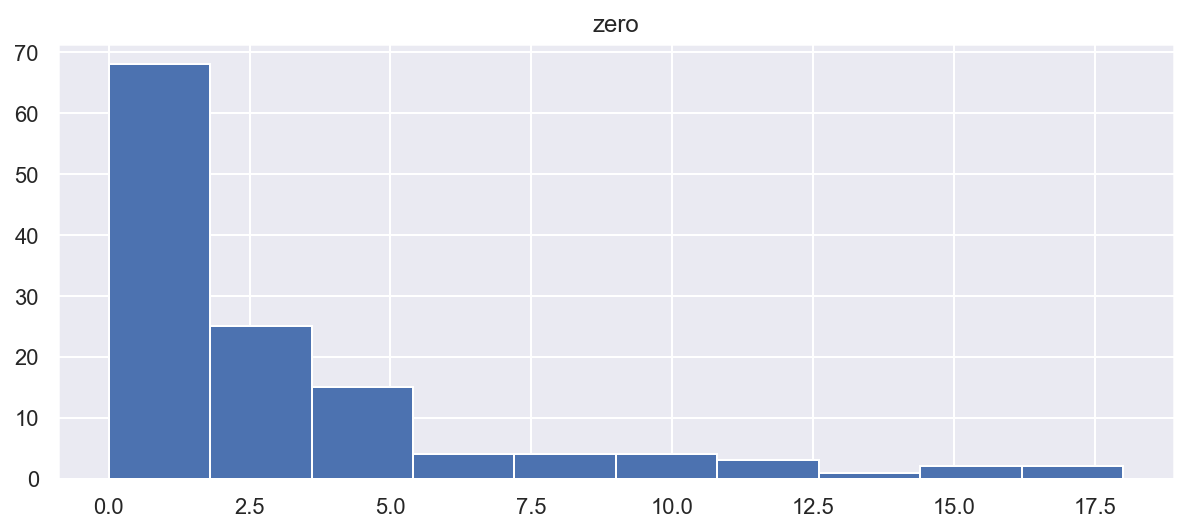

In [13]:
features = ['zero']
df[features].hist(figsize=(10, 4));

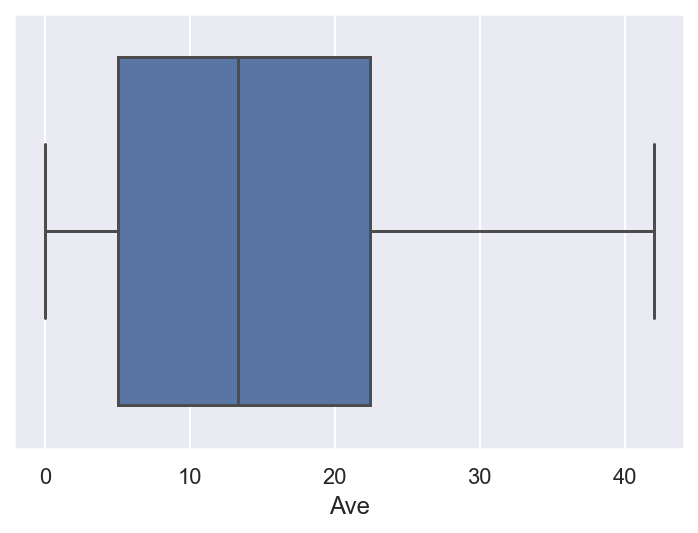

In [25]:
sns.boxplot(x='Ave', data=df);

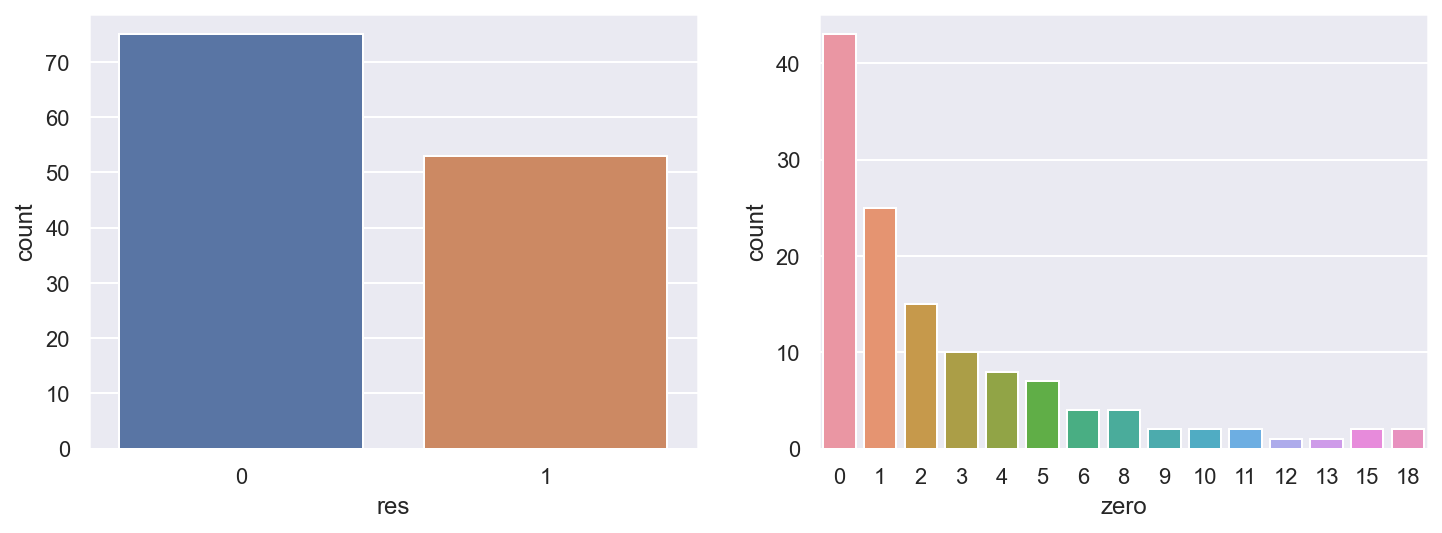

In [15]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='res', data=df, ax=axes[0]);
sns.countplot(x='zero', data=df, ax=axes[1]);

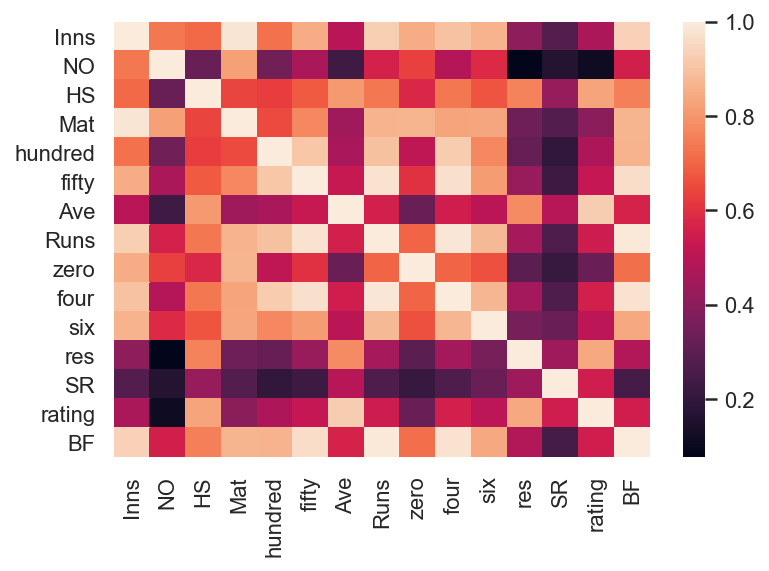

In [19]:
# Drop non-numerical variables
numerical = list(set(df.columns))

corr_matrix = df[numerical].corr()

sns.heatmap(corr_matrix);

<AxesSubplot:>

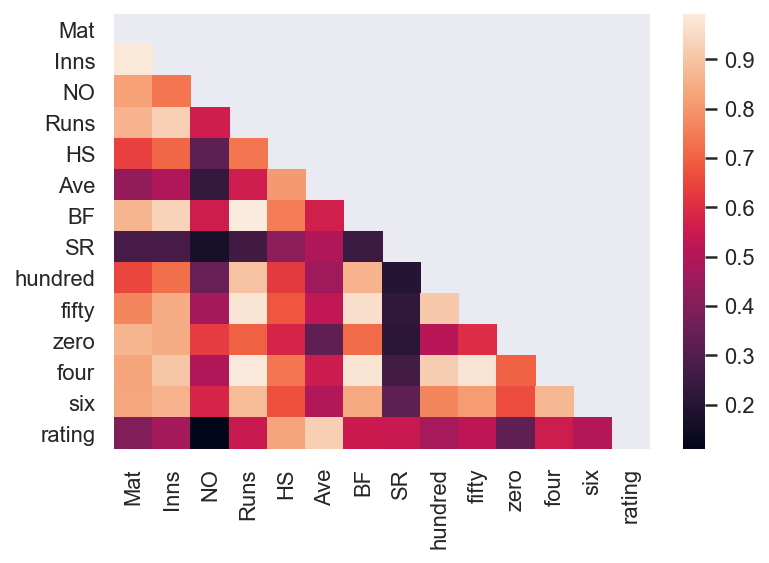

In [21]:
inputs=df.drop(['res','Player','Span'],axis='columns')
corr= inputs.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, mask=matrix)

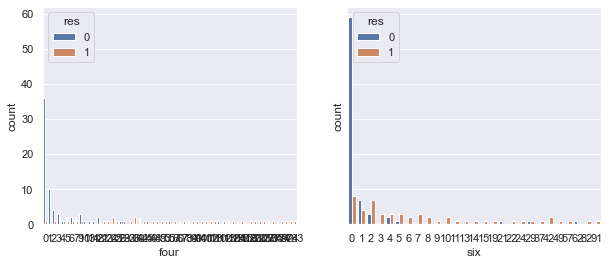

In [24]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='four', hue='res', data=df, ax=axes[0]);
sns.countplot(x='six', hue='res', data=df, ax=axes[1]);

In [18]:
%config InlineBackend.figure_format = 'retina'

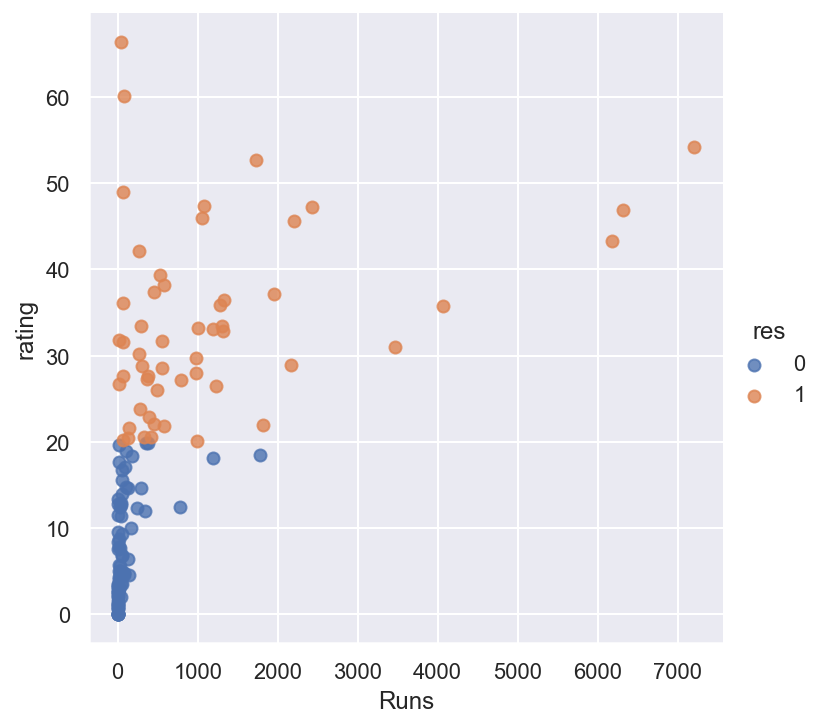

In [19]:
sns.lmplot('Runs', 'rating', data=df, hue='res', fit_reg=False);

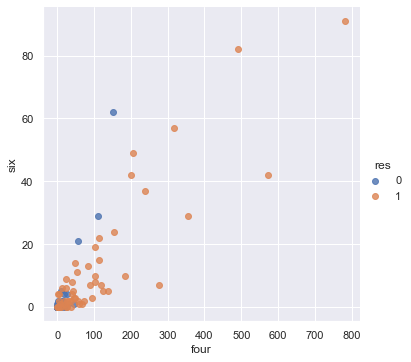

In [25]:
sns.lmplot('four', 'six', data=df, hue='res', fit_reg=False);

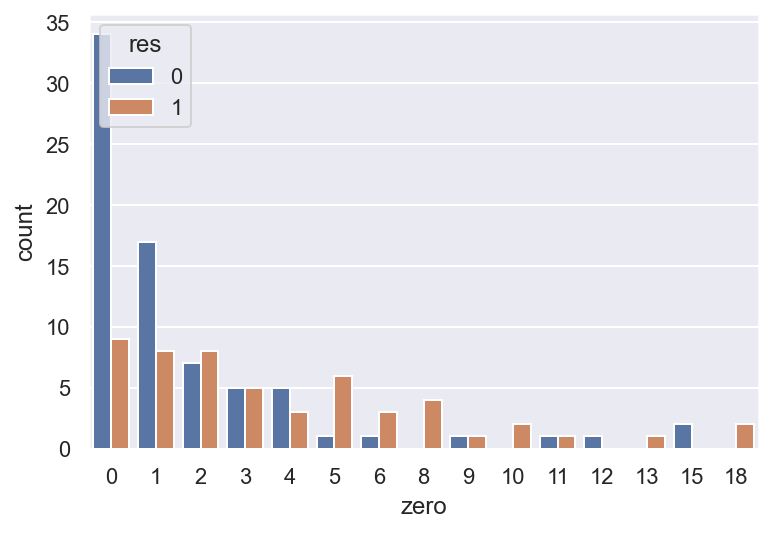

In [21]:
sns.countplot(x='zero', hue='res', data=df);

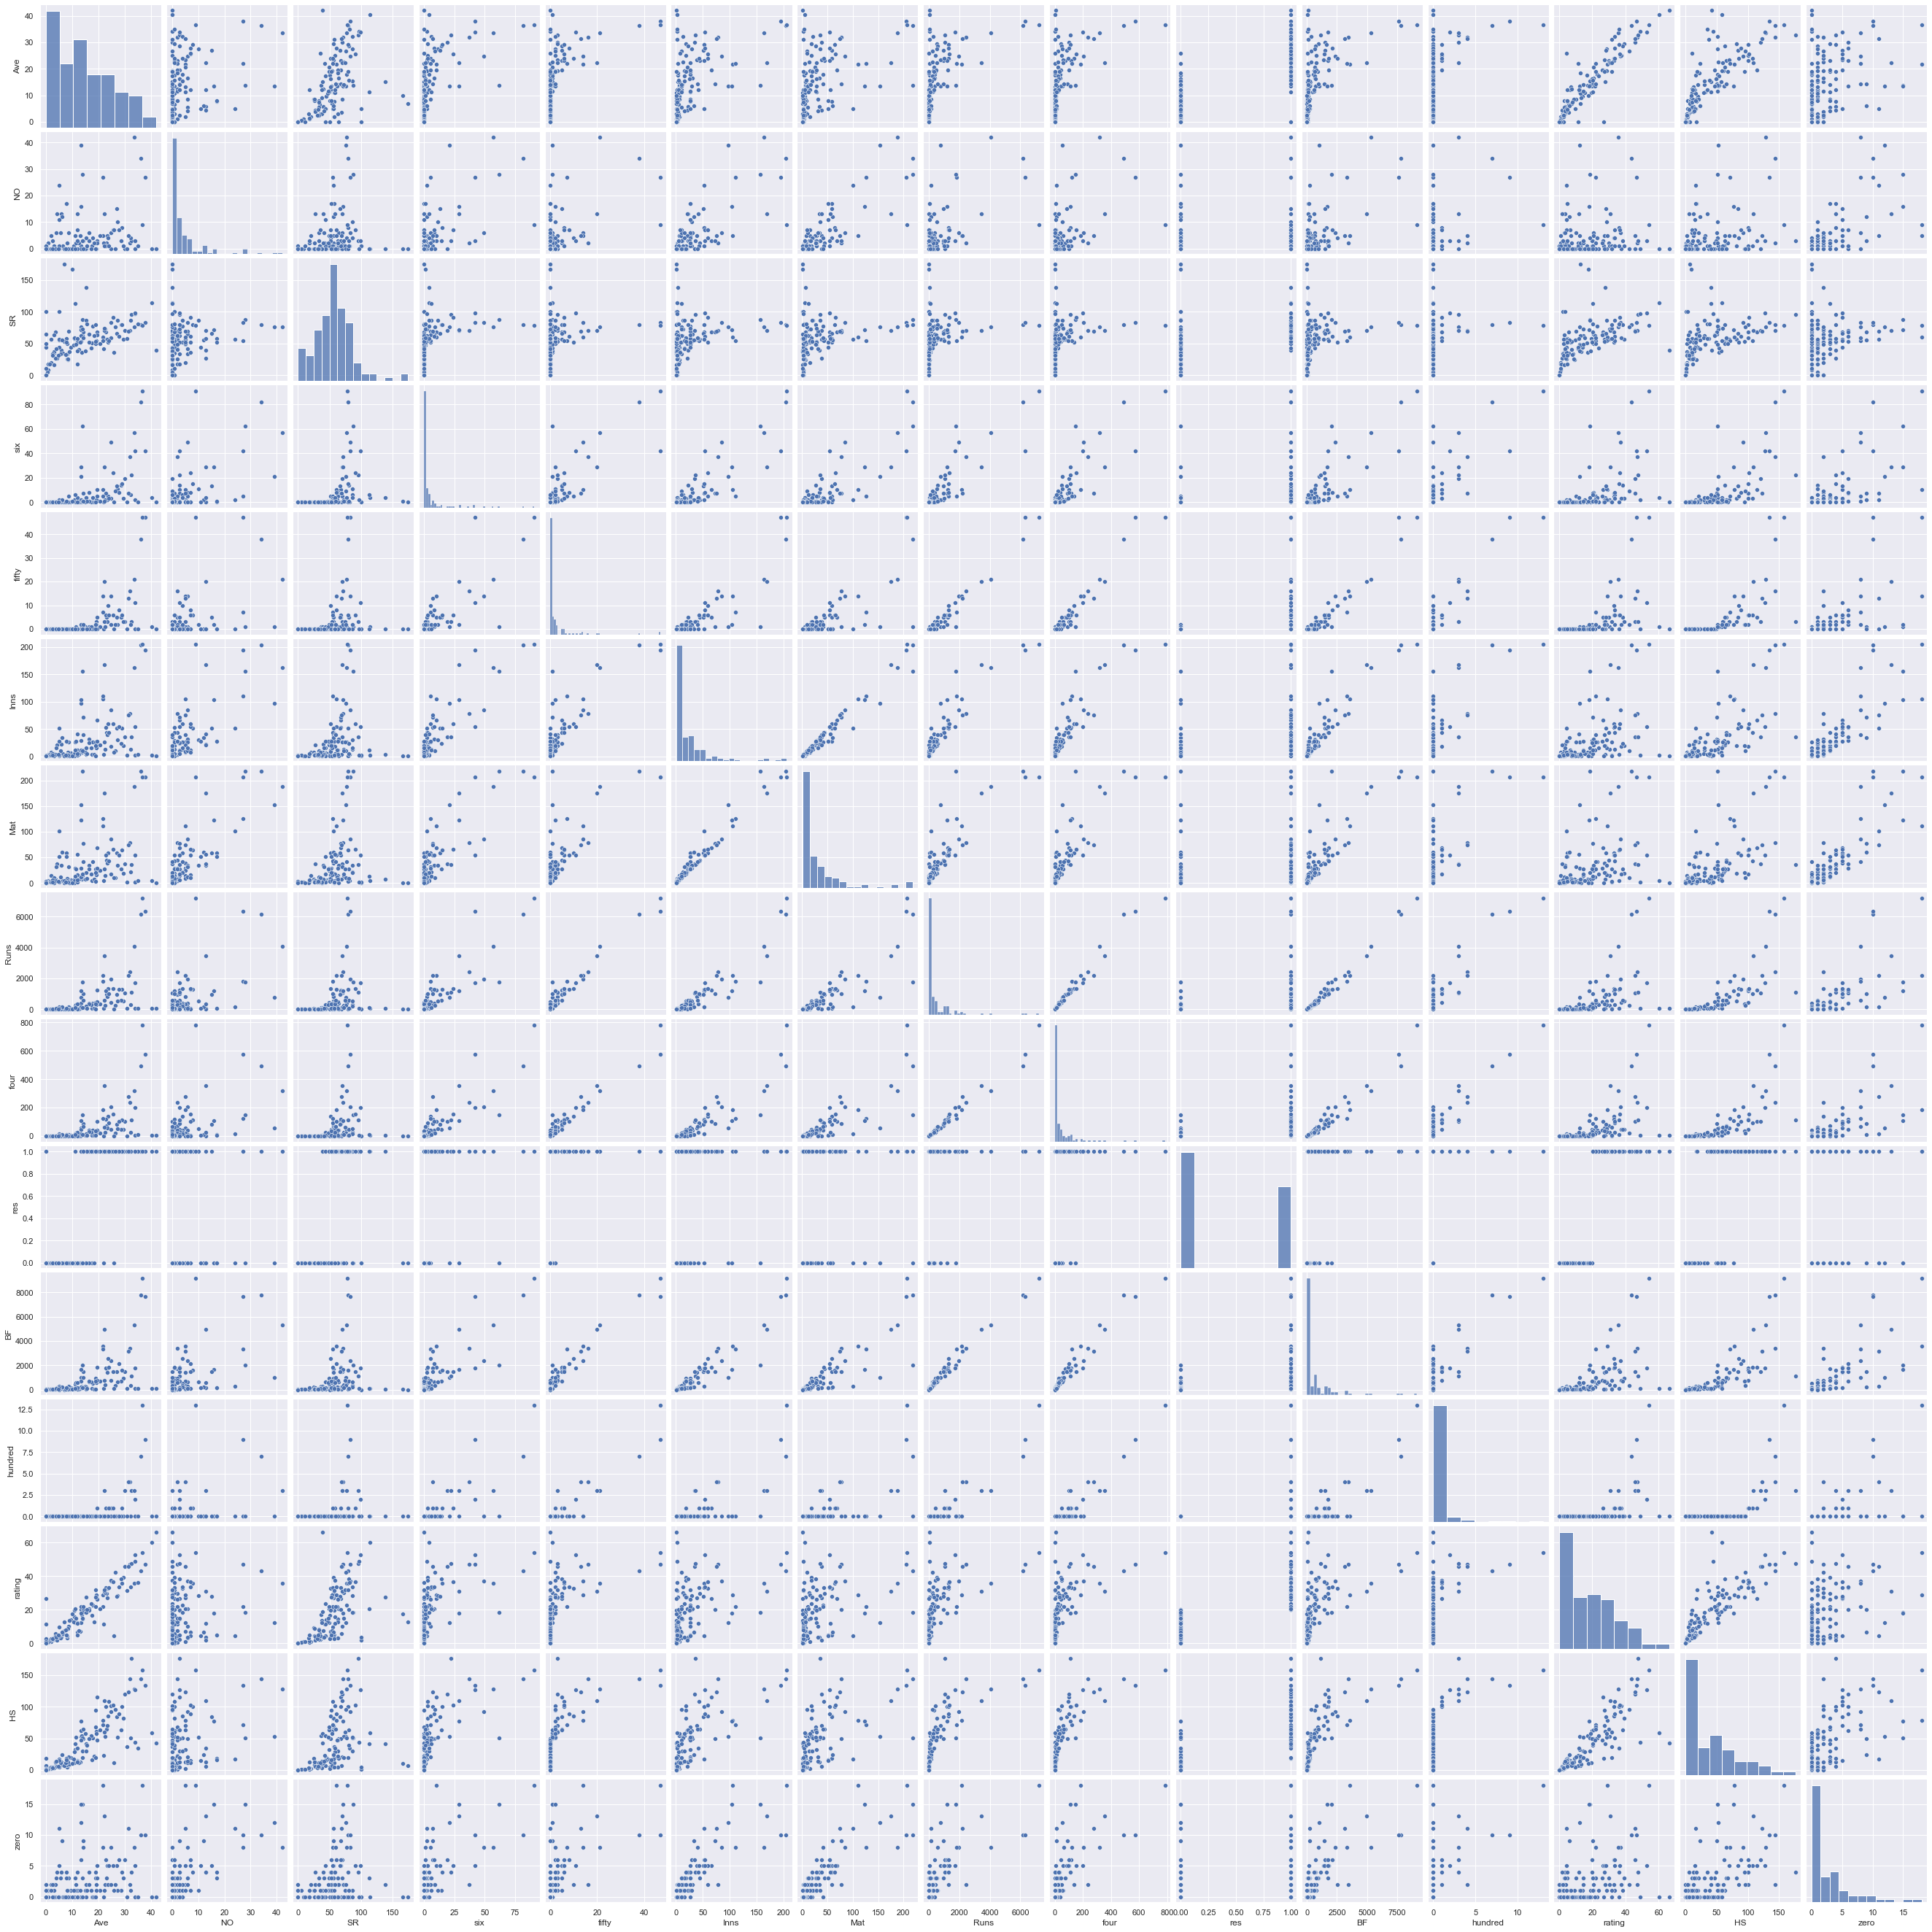

In [22]:
# `pairplot()` may become very slow with the SVG or retina format
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [29]:
target=df.res
inputs=df.drop(['res'],axis='columns')

In [35]:
X_train, X_test, y_train, y_test= train_test_split(inputs,target,test_size=0.3)

In [36]:
model = GaussianNB()

In [37]:
model.fit(X_train, y_train)

GaussianNB()

In [38]:
model.score(X_test, y_test)

0.9166666666666666

In [39]:
y_test[:5]

5     1
6     1
73    0
2     1
3     0
Name: res, dtype: int64

In [40]:
model.predict(X_test[:5])

array([1, 1, 0, 1, 1], dtype=int64)

In [51]:
model.predict_proba(X_test[:10])

array([[2.26800320e-02, 9.77319968e-01],
       [6.94307879e-09, 9.99999993e-01],
       [9.99987997e-01, 1.20027744e-05],
       [5.75610732e-13, 1.00000000e+00],
       [1.11144662e-01, 8.88855338e-01],
       [5.61743178e-35, 1.00000000e+00],
       [5.33125436e-03, 9.94668746e-01],
       [1.57692394e-02, 9.84230761e-01],
       [8.09708052e-20, 1.00000000e+00],
       [5.85893244e-02, 9.41410676e-01]])

In [42]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.90909091, 1.        , 0.81818182, 0.90909091, 0.81818182])

In [43]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(GaussianNB(), X_train, y_train, train_sizes=[10, 25, 44], cv=5)

In [44]:
X, y = df.drop(['res'],axis='columns'),target
from sklearn.linear_model import Ridge
train_scores, valid_scores = validation_curve(Ridge(), X, y, "alpha",np.logspace(-7, 3, 3), cv=5)                                             cv=5)

SyntaxError: invalid syntax (<ipython-input-44-78b51fc0b4a6>, line 3)

In [ ]:
X_train.to_csv('xtrain.csv',index=False)
X_test.to_csv('xtest.csv',index=False)
y_train.to_csv('ytrain.csv',index=False)
y_test.to_csv('ytest.csv',index=False)

In [45]:

param_range = np.arange(1,50, 2)

train_scores, test_scores = validation_curve(GaussianNB(),
                                  X, y, param_name="priors", param_range=param_range,
                                  cv=4, scoring="accuracy", n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

 # Plotting mean accuracy scores for training and test sets
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="blue")
plt.plot(param_range, test_mean, label="Cross-validation score", color="red")

    # Plotting accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="yellow")

    # Creating plot    
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()



NameError: name 'X' is not defined

In [46]:
GaussianNB().get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [50]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(X_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ValueError: continuous-multioutput format is not supported